In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
modified_data = pd.read_csv('term-deposit-marketing-background-variables.csv')

In [3]:
modified_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_group,age_group_new,balance_group,y_encoded,job_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,45-60,30-60,2000-4000,0,management_entrepreneur
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,30-45,30-60,<1000,0,office_support
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,30-45,30-60,<1000,0,management_entrepreneur
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,45-60,30-60,1000-2000,0,manual_labor
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,30-45,30-60,<1000,0,unknown


In [4]:
from sklearn.model_selection import train_test_split

# Add 'customer_id' column based on the index
modified_data = modified_data.reset_index().rename(columns={'index': 'customer_id'})

# Split into train and test sets
train_df, test_df = train_test_split(modified_data, test_size=0.2, random_state=42, shuffle=True)

# Reset index for both sets
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [5]:
modified_data.head()

,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_group,age_group_new,balance_group,y_encoded,job_group
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,45-60,30-60,2000-4000,0,management_entrepreneur
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,30-45,30-60,<1000,0,office_support
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,30-45,30-60,<1000,0,management_entrepreneur
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,45-60,30-60,1000-2000,0,manual_labor
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,30-45,30-60,<1000,0,unknown


In [6]:
train_df.head()

,customer_id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_group,age_group_new,balance_group,y_encoded,job_group
0,14307,32,management,married,tertiary,no,184,yes,no,cellular,14,jul,238,3,no,30-45,30-60,<1000,0,management_entrepreneur
1,17812,44,housemaid,married,primary,no,1109,yes,yes,cellular,29,jul,176,4,no,30-45,30-60,1000-2000,0,manual_labor
2,11020,37,management,single,tertiary,yes,-25,no,no,unknown,17,jun,136,2,no,30-45,30-60,<1000,0,management_entrepreneur
3,15158,59,retired,married,tertiary,no,6108,yes,no,cellular,17,jul,796,2,no,45-60,30-60,>4000,0,not_working
4,24990,49,management,married,tertiary,no,0,yes,no,cellular,18,nov,102,1,no,45-60,30-60,<1000,0,management_entrepreneur


In [7]:
background_df = train_df.drop(['age', 'job', 'balance', 'contact', 'day', 'month', 'duration', 'campaign','y','age_group'], axis=1)
background_df.head()

,customer_id,marital,education,default,housing,loan,age_group_new,balance_group,y_encoded,job_group
0,14307,married,tertiary,no,yes,no,30-60,<1000,0,management_entrepreneur
1,17812,married,primary,no,yes,yes,30-60,1000-2000,0,manual_labor
2,11020,single,tertiary,yes,no,no,30-60,<1000,0,management_entrepreneur
3,15158,married,tertiary,no,yes,no,30-60,>4000,0,not_working
4,24990,married,tertiary,no,yes,no,30-60,<1000,0,management_entrepreneur


In [8]:
# Map 'age_group_new' categories to g1, g2, g3
age_group_map = {
    '<30': 'age_less_than_30',
    '30-60': 'age_more_than30_less_than_60',
    '>60': 'age_more_than_60'
}

# Map 'balance_group' categories to b1, b2, b3, b4
balance_group_map = {
    '<1000': 'balance_less_than_1000',
    '1000-2000': 'balance_1000_to_2000',
    '2000-4000': 'balance_2000_to_4000',
    '>4000': 'balance_more_than_4000'
}

# Apply mapping to all relevant DataFrames
for df in [background_df, train_df, test_df]:
    if 'age_group_new' in df.columns:
        df['age_group_new_mapped'] = df['age_group_new'].map(age_group_map)
    if 'balance_group' in df.columns:
        df['balance_group_mapped'] = df['balance_group'].map(balance_group_map)

In [9]:
test_df.to_csv('test_modifed.csv', index=False)

In [10]:
train_df['y'].value_counts()

y
no     29680
yes     2320
Name: count, dtype: int64

In [11]:
test_df['y'].value_counts()

y
no     7424
yes     576
Name: count, dtype: int64

In [12]:
background_df = background_df.drop(['age_group_new', 'balance_group'], axis=1)

In [13]:
background_df.head()

,customer_id,marital,education,default,housing,loan,y_encoded,job_group,age_group_new_mapped,balance_group_mapped
0,14307,married,tertiary,no,yes,no,0,management_entrepreneur,age_more_than30_less_than_60,balance_less_than_1000
1,17812,married,primary,no,yes,yes,0,manual_labor,age_more_than30_less_than_60,balance_1000_to_2000
2,11020,single,tertiary,yes,no,no,0,management_entrepreneur,age_more_than30_less_than_60,balance_less_than_1000
3,15158,married,tertiary,no,yes,no,0,not_working,age_more_than30_less_than_60,balance_more_than_4000
4,24990,married,tertiary,no,yes,no,0,management_entrepreneur,age_more_than30_less_than_60,balance_less_than_1000


In [14]:
from sklearn.model_selection import train_test_split

# Drop 'customer_id' column
background_features = background_df.drop('customer_id', axis=1)

# Split into train and validation sets
bg_train_df, bg_val_df = train_test_split(background_features, test_size=0.2, random_state=42, shuffle=True)

# Reset index for both sets
bg_train_df = bg_train_df.reset_index(drop=True)
bg_val_df = bg_val_df.reset_index(drop=True)

In [15]:
bg_train_df.head()

,marital,education,default,housing,loan,y_encoded,job_group,age_group_new_mapped,balance_group_mapped
0,married,tertiary,no,no,no,0,management_entrepreneur,age_more_than30_less_than_60,balance_2000_to_4000
1,married,secondary,no,no,no,1,not_working,age_more_than_60,balance_more_than_4000
2,divorced,secondary,no,yes,yes,0,office_support,age_more_than30_less_than_60,balance_2000_to_4000
3,married,secondary,no,yes,no,0,office_support,age_more_than30_less_than_60,balance_less_than_1000
4,married,primary,no,yes,no,0,manual_labor,age_more_than30_less_than_60,balance_2000_to_4000


In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Prepare features and target
X_train = bg_train_df.drop('y_encoded', axis=1)
y_train = bg_train_df['y_encoded']
X_val = bg_val_df.drop('y_encoded', axis=1)
y_val = bg_val_df['y_encoded']

# Convert categorical variables to dummy/one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Align columns of validation set to training set
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Train XGBRegressor
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_encoded, y_train)

# Predict on validation set
y_pred = xgb_reg.predict(X_val_encoded)

# Evaluate
mse = mean_squared_error(y_val, y_pred)
print(f"Validation MSE: {mse:.4f}")

Validation MSE: 0.0739


In [17]:
import joblib

# Save the trained XGBRegressor model to a file
joblib.dump(xgb_reg, 'xgb_reg_model.joblib')

['xgb_reg_model.joblib']

C:\Users\samar\AppData\Local\Temp\ipykernel_12088\864089877.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


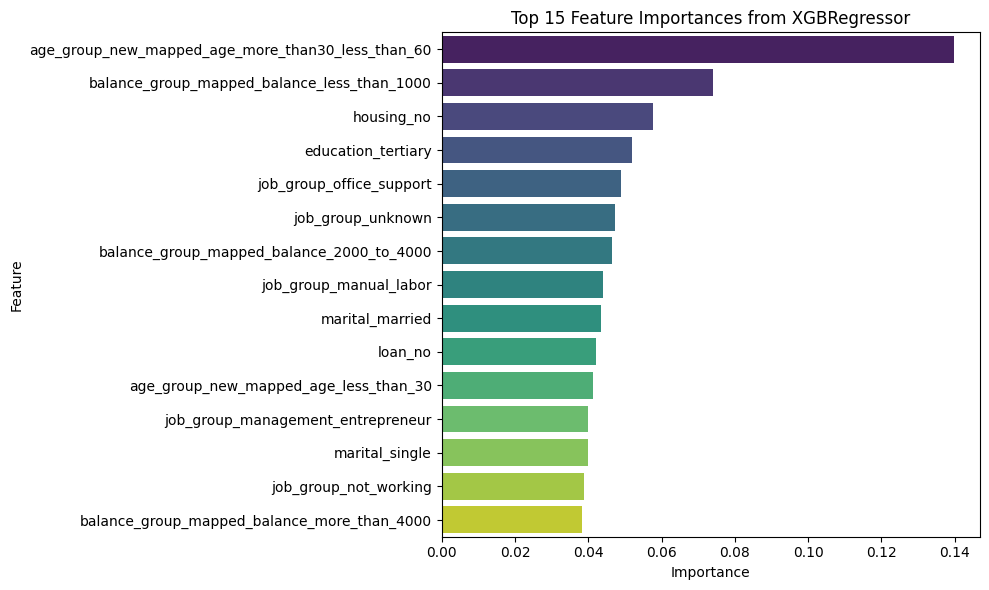

In [18]:
# Get feature importances from the trained XGBRegressor
importances = xgb_reg.feature_importances_
feature_names = X_train_encoded.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [19]:
# Predict subscription probability for training and validation sets
X_train['subscription_prob'] = xgb_reg.predict(X_train_encoded)
X_val['subscription_prob'] = xgb_reg.predict(X_val_encoded)

# Show the first 5 rows of each
print(X_train[['subscription_prob']].head())
print(X_val[['subscription_prob']].head())

   subscription_prob
0           0.103514
1           0.437920
2           0.028508
3           0.050882
4           0.052690
   subscription_prob
0           0.061476
1           0.020679
2           0.050882
3           0.061605
4           0.080561


In [20]:
X_train.head()

,marital,education,default,housing,loan,job_group,age_group_new_mapped,balance_group_mapped,subscription_prob
0,married,tertiary,no,no,no,management_entrepreneur,age_more_than30_less_than_60,balance_2000_to_4000,0.103514
1,married,secondary,no,no,no,not_working,age_more_than_60,balance_more_than_4000,0.437920
2,divorced,secondary,no,yes,yes,office_support,age_more_than30_less_than_60,balance_2000_to_4000,0.028508
3,married,secondary,no,yes,no,office_support,age_more_than30_less_than_60,balance_less_than_1000,0.050882
4,married,primary,no,yes,no,manual_labor,age_more_than30_less_than_60,balance_2000_to_4000,0.052690


In [21]:
X_val.head()

,marital,education,default,housing,loan,job_group,age_group_new_mapped,balance_group_mapped,subscription_prob
0,divorced,tertiary,no,no,no,management_entrepreneur,age_more_than30_less_than_60,balance_less_than_1000,0.061476
1,divorced,secondary,no,no,no,manual_labor,age_more_than30_less_than_60,balance_less_than_1000,0.020679
2,married,secondary,no,yes,no,office_support,age_more_than30_less_than_60,balance_less_than_1000,0.050882
3,married,tertiary,no,yes,no,management_entrepreneur,age_more_than30_less_than_60,balance_2000_to_4000,0.061605
4,single,secondary,no,yes,no,office_support,age_more_than30_less_than_60,balance_1000_to_2000,0.080561


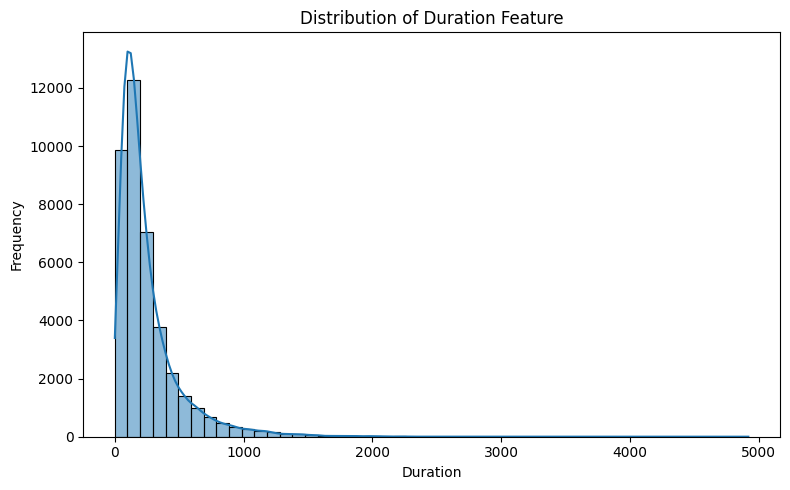

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(modified_data['duration'], bins=50, kde=True)
plt.title('Distribution of Duration Feature')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

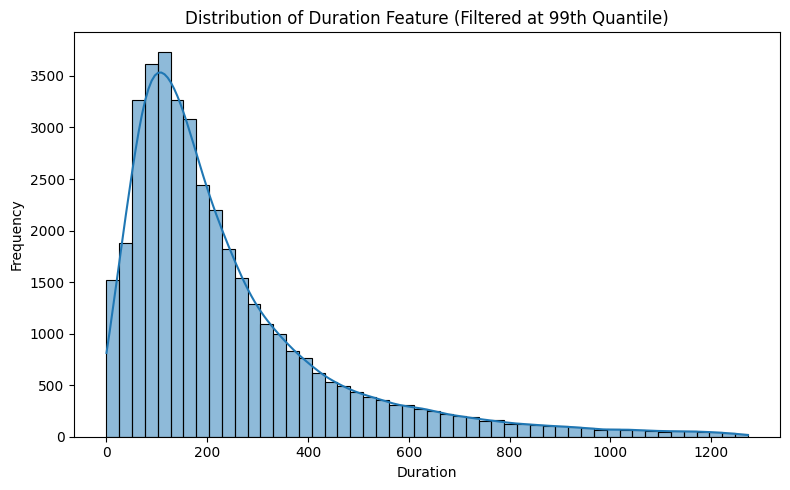

In [24]:
# Filter the 'duration' feature in modified_data using the 99th quantile
duration_99 = modified_data['duration'].quantile(0.99)
filtered_duration = modified_data[modified_data['duration'] <= duration_99]['duration']

# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(filtered_duration, bins=50, kde=True)
plt.title('Distribution of Duration Feature (Filtered at 99th Quantile)')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

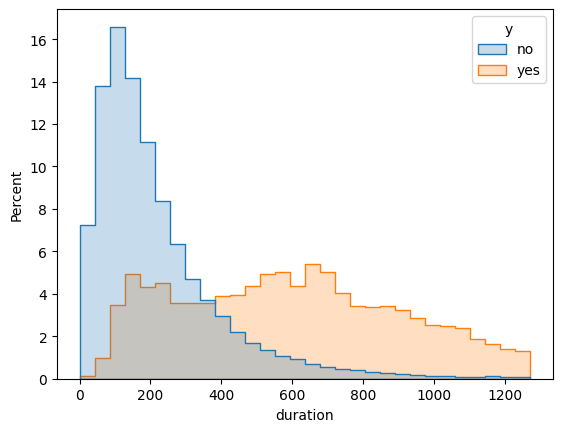

In [33]:

# Prepare filtered data with y label
filtered_df = modified_data[modified_data['duration'] <= duration_99]

# Plot without custom labels to see the default
sns.histplot(data=filtered_df, x='duration', hue='y', bins=30, element='step', 
             stat='percent', common_norm=False)
plt.show()  # Check what the default legend shows

C:\Users\samar\AppData\Local\Temp\ipykernel_12088\42080831.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='y', y='duration', palette='Set2', ax=axes[1])


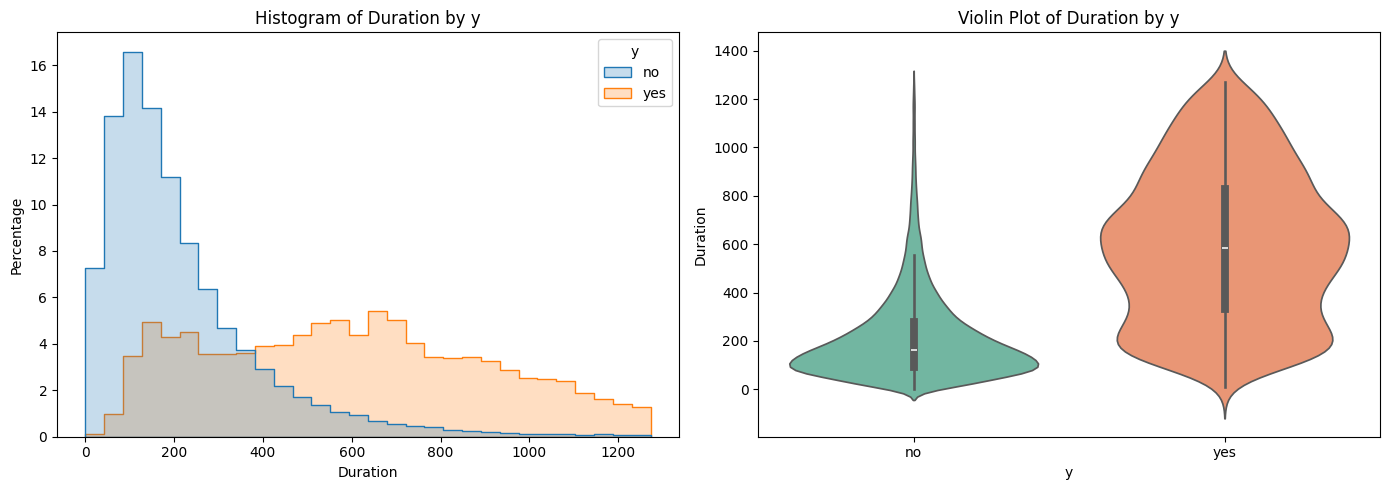

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram by y
sns.histplot(data=filtered_df, x='duration', hue='y', bins=30, element='step', stat='percent', common_norm=False, ax=axes[0])
axes[0].set_title('Histogram of Duration by y')
axes[0].set_xlabel('Duration')
axes[0].set_ylabel('Percentage')

# Violin plot by y
sns.violinplot(data=filtered_df, x='y', y='duration', palette='Set2', ax=axes[1])
axes[1].set_title('Violin Plot of Duration by y')
axes[1].set_xlabel('y')
axes[1].set_ylabel('Duration')

plt.tight_layout()
plt.show()

In [40]:
# Create new duration category feature in modified_data
def duration_category(duration):
    if duration < 300:
        return 'short'
    elif duration <= 700:
        return 'medium'
    else:
        return 'long'

modified_data['duration_category'] = modified_data['duration'].apply(duration_category)
print(modified_data['duration_category'].value_counts())

filtered_df['duration_category'] = filtered_df['duration'].apply(duration_category)
print(filtered_df['duration_category'].value_counts())

duration_category
short     29389
medium     8237
long       2374
Name: count, dtype: int64
duration_category
short     29389
medium     8237
long       1974
Name: count, dtype: int64


C:\Users\samar\AppData\Local\Temp\ipykernel_12088\2688575313.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['duration_category'] = filtered_df['duration'].apply(duration_category)


C:\Users\samar\AppData\Local\Temp\ipykernel_12088\1704970577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset, x='y', y='duration', palette='Set2', ax=axes[i])
C:\Users\samar\AppData\Local\Temp\ipykernel_12088\1704970577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset, x='y', y='duration', palette='Set2', ax=axes[i])
C:\Users\samar\AppData\Local\Temp\ipykernel_12088\1704970577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=subset, x='y', y='duration', palette='Set2', ax=axes[i])


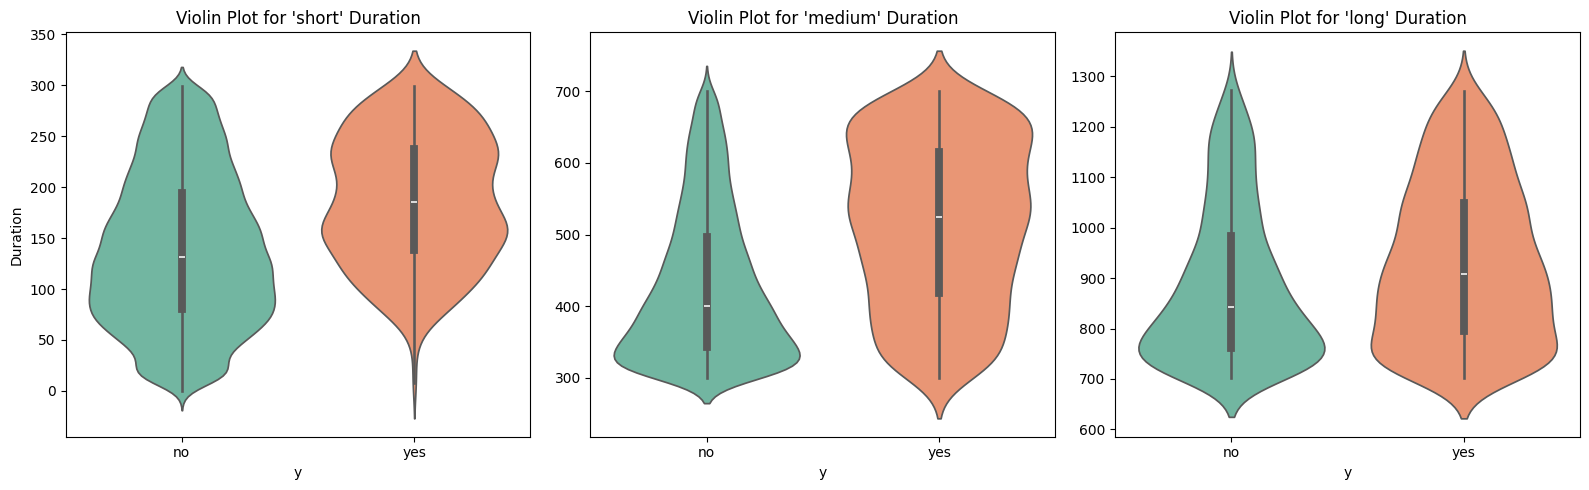

In [41]:
# Create subplots for each duration_category
duration_categories = filtered_df['duration_category'].unique()
duration_categories = ['short', 'medium', 'long']  # Ensure order

fig, axes = plt.subplots(1, len(duration_categories), figsize=(16, 5))

for i, cat in enumerate(duration_categories):
    subset = filtered_df[filtered_df['duration_category'] == cat]
    sns.violinplot(data=subset, x='y', y='duration', palette='Set2', ax=axes[i])
    axes[i].set_title(f"Violin Plot for '{cat}' Duration")
    axes[i].set_xlabel('y')
    if i == 0:
        axes[i].set_ylabel('Duration')
    else:
        axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

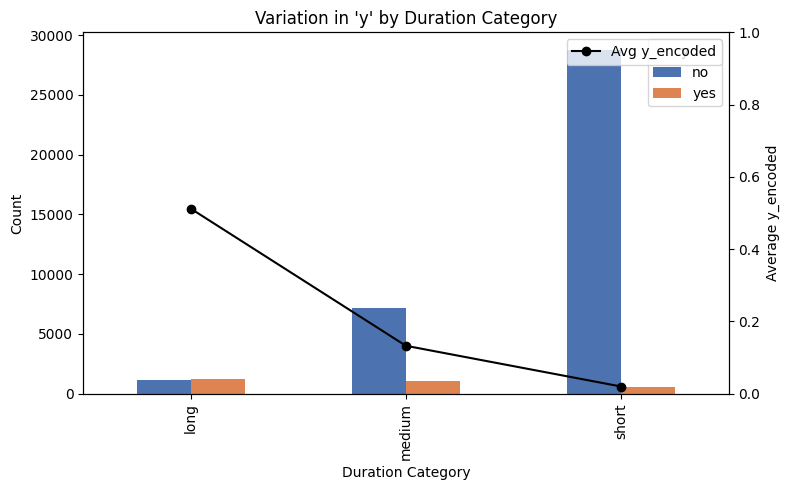

In [43]:
# Calculate counts of 'y' for each 'duration_category'
cat_counts = modified_data.groupby(['duration_category', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each duration_category
cat_avg = modified_data.groupby('duration_category')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for y counts by duration_category
cat_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Duration Category')
ax1.set_title("Variation in 'y' by Duration Category")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(cat_avg.index, cat_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

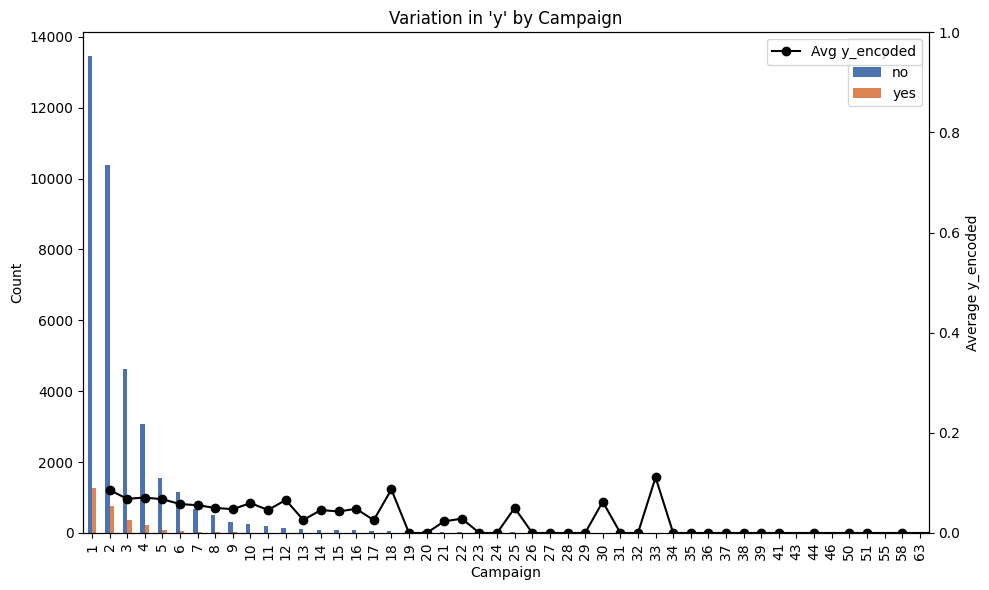

In [46]:
# Bar plots for 'campaign' distribution by 'y' and line plot for average y_encoded

# Calculate counts of 'y' for each 'campaign' value
campaign_counts = modified_data.groupby(['campaign', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each campaign value
campaign_avg = modified_data.groupby('campaign')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for y counts by campaign
campaign_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Campaign')
ax1.set_title("Variation in 'y' by Campaign")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(campaign_avg.index, campaign_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [50]:
# Create a new campaign category feature in modified_data
def campaign_category(campaign):
    if campaign == 1:
        return 'campaign_1'
    elif campaign == 2:
        return 'campaign_2'
    elif campaign == 3:
        return 'campaign_3'
    elif 4 <= campaign <= 10:
        return 'campaign_mt3_lt11'
    else:
        return 'campaign_gt10'

modified_data['campaign_category_v2'] = modified_data['campaign'].apply(campaign_category)
modified_data['campaign_category_v2'].value_counts()

campaign_category_v2
campaign_1           14718
campaign_2           11153
campaign_mt3_lt11     7972
campaign_3            4970
campaign_gt10         1187
Name: count, dtype: int64

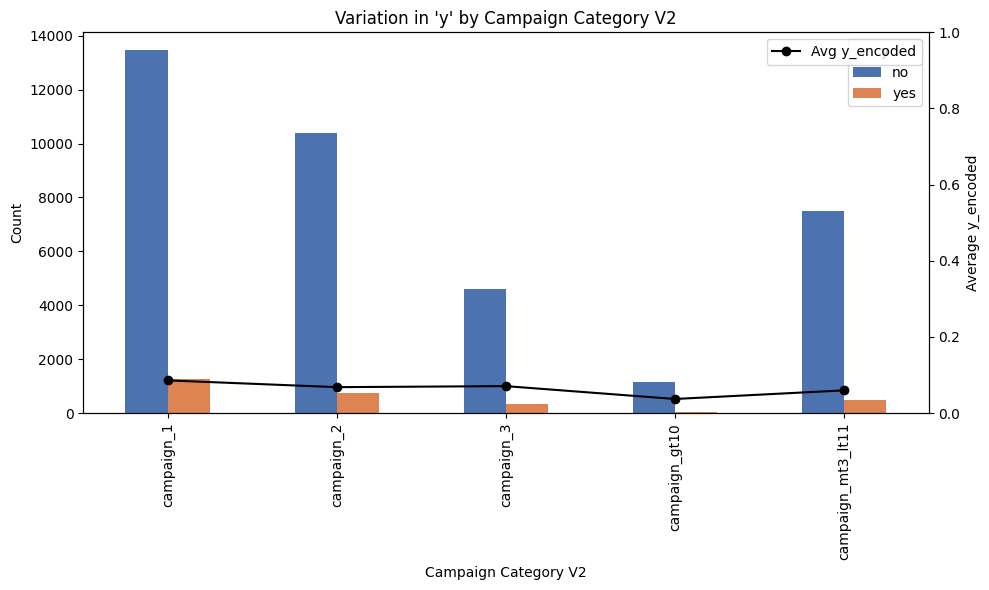

In [51]:
# Bar plots for 'campaign_category_v2' distribution by 'y' and line plot for average y_encoded

# Calculate counts of 'y' for each 'campaign_category_v2' value
campaign_cat_v2_counts = modified_data.groupby(['campaign_category_v2', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each campaign_category_v2 value
campaign_cat_v2_avg = modified_data.groupby('campaign_category_v2')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for y counts by campaign_category_v2
campaign_cat_v2_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Campaign Category V2')
ax1.set_title("Variation in 'y' by Campaign Category V2")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(campaign_cat_v2_avg.index, campaign_cat_v2_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

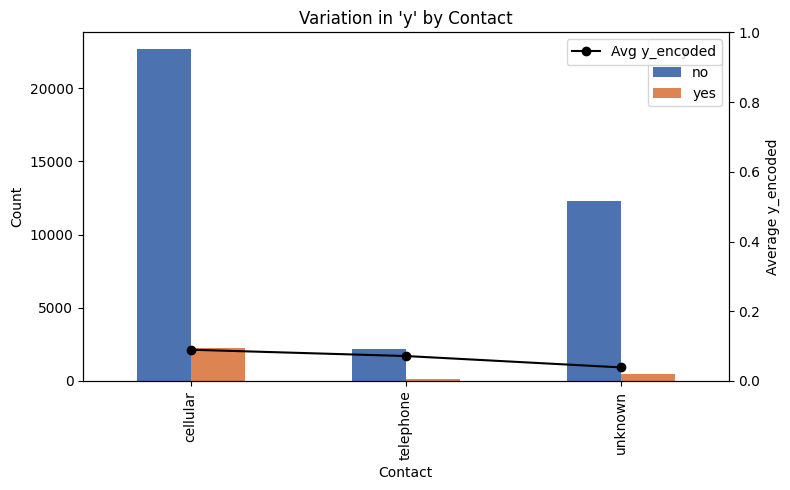

In [ ]:
# Bar plots for 'contact' distribution by 'y' and line plot for average y_encoded

# Calculate counts of 'y' for each 'contact' value
contact_counts = modified_data.groupby(['contact', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each contact value
contact_avg = modified_data.groupby('contact')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for y counts by contact
contact_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Contact')
ax1.set_title("Variation in 'y' by Contact")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(contact_avg.index, contact_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

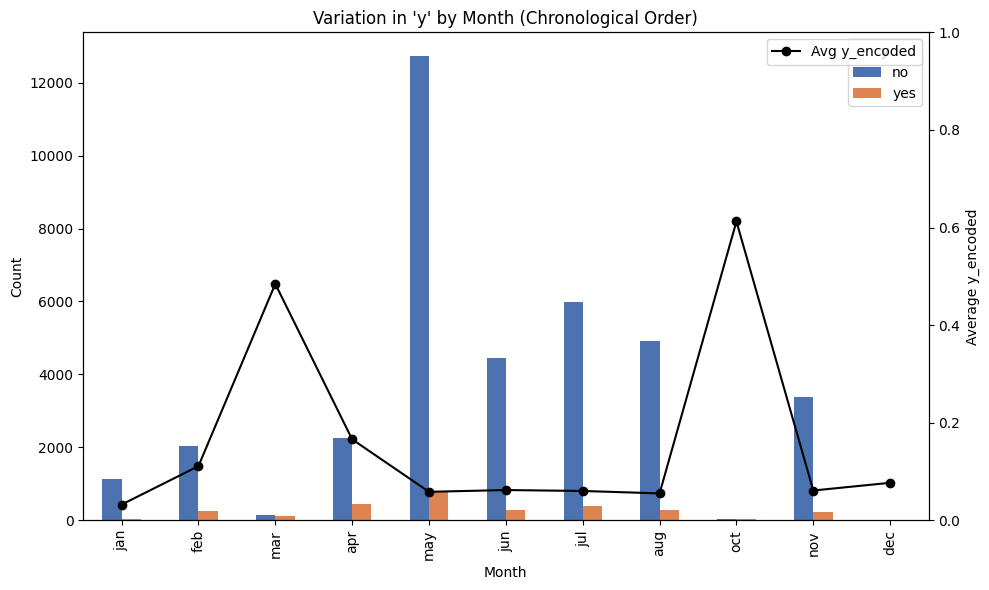

In [53]:
# Define the correct chronological order for months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Filter months present in the data and preserve order
months_in_data = [m for m in month_order if m in month_counts.index]

# Reindex month_counts and month_avg to the correct order
month_counts_sorted = month_counts.reindex(months_in_data)
month_avg_sorted = month_avg.reindex(months_in_data)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for y counts by month (in order)
month_counts_sorted.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Month')
ax1.set_title("Variation in 'y' by Month (Chronological Order)")

# Line plot for average y_encoded (in order)
ax2 = ax1.twinx()
ax2.plot(month_avg_sorted.index, month_avg_sorted.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [54]:
# Define mapping from month to period category
month_to_period = {
    'jan': 'start_year', 'feb': 'start_year', 'mar': 'start_year', 'apr': 'start_year',
    'may': 'mid_year', 'jun': 'mid_year', 'jul': 'mid_year', 'aug': 'mid_year',
    'sep': 'end_year', 'oct': 'end_year', 'nov': 'end_year', 'dec': 'end_year'
}

# Create the new feature
modified_data['month_period'] = modified_data['month'].map(month_to_period)
modified_data['month_period'].value_counts()

month_period
mid_year      29861
start_year     6448
end_year       3691
Name: count, dtype: int64

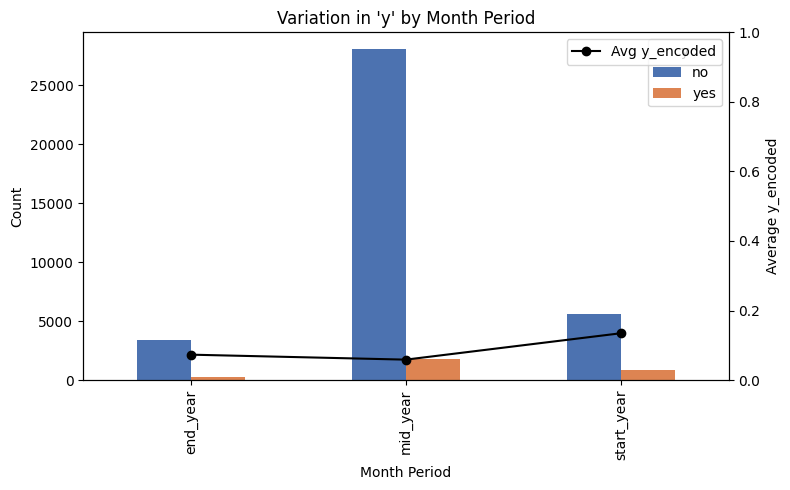

In [55]:
# Calculate counts of 'y' for each 'month_period' value
month_period_counts = modified_data.groupby(['month_period', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each month_period value
month_period_avg = modified_data.groupby('month_period')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for y counts by month_period
month_period_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Month Period')
ax1.set_title("Variation in 'y' by Month Period")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(month_period_avg.index, month_period_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

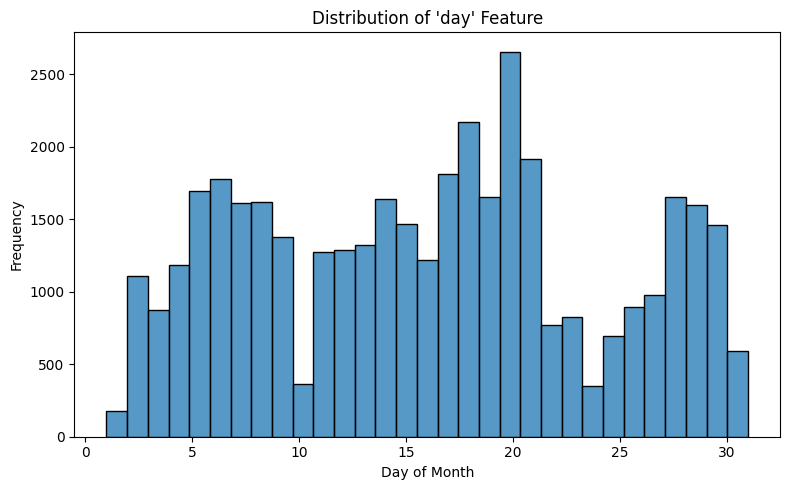

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(modified_data['day'], bins=31, kde=False)
plt.title("Distribution of 'day' Feature")
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_12088\1549324550.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=modified_data, x='y', y='day', palette='Set2', ax=axes[1])


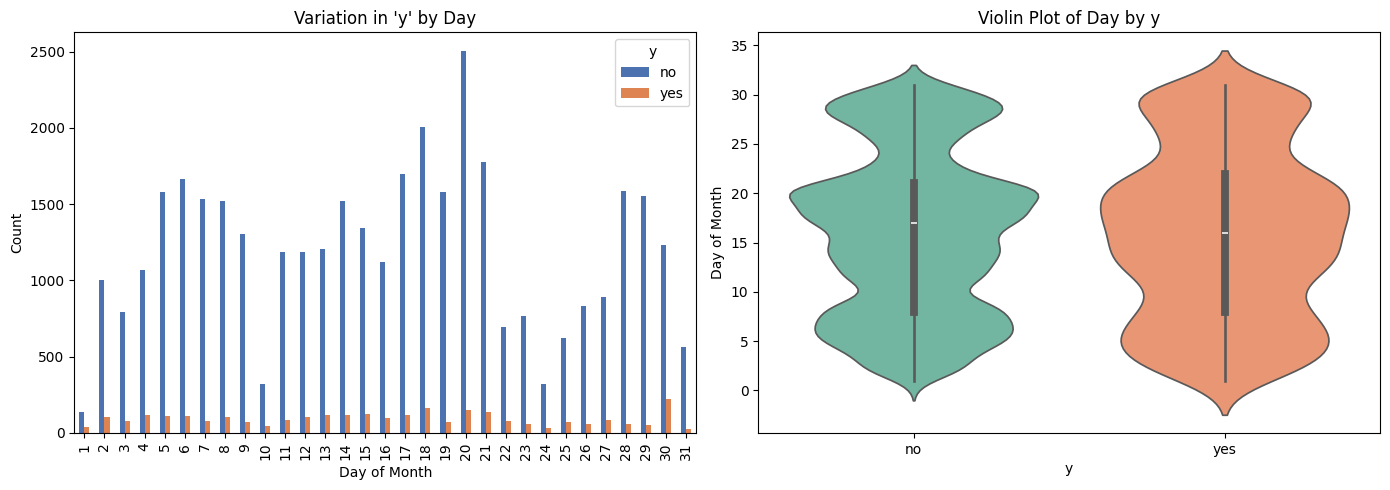

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot: Variation of y for the 'day' feature
day_counts = modified_data.groupby(['day', 'y']).size().unstack(fill_value=0)
day_counts.plot(kind='bar', stacked=False, ax=axes[0], color=['#4C72B0', '#DD8452'])
axes[0].set_title("Variation in 'y' by Day")
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('Count')
axes[0].legend(title='y')

# Violin plot: Distribution of 'day' by y
sns.violinplot(data=modified_data, x='y', y='day', palette='Set2', ax=axes[1])
axes[1].set_title("Violin Plot of Day by y")
axes[1].set_xlabel('y')
axes[1].set_ylabel('Day of Month')

plt.tight_layout()
plt.show()

In [58]:
def day_category(day):
    if day < 10:
        return 'before_10th'
    elif 10 <= day <= 20:
        return '10th_to_20th'
    else:
        return 'after_20th'

modified_data['day_category'] = modified_data['day'].apply(day_category)
modified_data['day_category'].value_counts()

day_category
10th_to_20th    16859
after_20th      11724
before_10th     11417
Name: count, dtype: int64

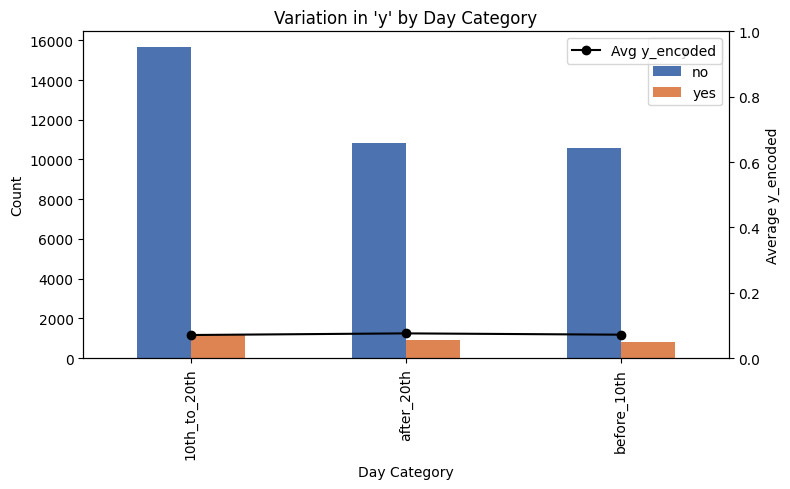

In [59]:
# Bar plots for 'day_category' distribution by 'y' and line plot for average y_encoded

# Calculate counts of 'y' for each 'day_category' value
day_cat_counts = modified_data.groupby(['day_category', 'y']).size().unstack(fill_value=0)

# Calculate average y_encoded for each day_category value
day_cat_avg = modified_data.groupby('day_category')['y_encoded'].mean()

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for y counts by day_category
day_cat_counts.plot(kind='bar', stacked=False, ax=ax1, color=['#4C72B0', '#DD8452'])
ax1.set_ylabel('Count')
ax1.set_xlabel('Day Category')
ax1.set_title("Variation in 'y' by Day Category")

# Line plot for average y_encoded
ax2 = ax1.twinx()
ax2.plot(day_cat_avg.index, day_cat_avg.values, color='black', marker='o', linestyle='-', label='Avg y_encoded')
ax2.set_ylabel('Average y_encoded')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()